<a id='main' name="main"></a>
# Viral Data Analysis

Date: 2021.10.12

Author: © 2021 Marius Oliandra

This notebook is part of an individual project for [KTU IF](https://fi.ktu.edu/)  [P176M010 Advanced Machine Learning](https://admissions.ktu.edu/programme/m-software-engineering/#P176M010) class led by [M. Lukoševičius](http://mantas.info/).

Here we analyze open COVID-19 data from [Our World in Data](https://ourworldindata.org/) to answer the following questions:

1. [Compare the new daily cases growth difference of covid-19 in Asia and Europe continents (2021 January to 2021 September).](#Q1)
1. [How does fully vaccinated people percentage corelate with daily mortality rate?](#Q2)
1. [Is it possible to predict new hospitalized patients number by new cases smoothed per million and people vaccinated per hundred in Baltic states?](#Q3)

This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">Creative Commons Attribution 4.0 International license</a>. <a rel="license" href="http://creativecommons.org/licenses/by/4.0/"><img alt="Creative Commons licencija" style="border-width:0" src="https://i.creativecommons.org/l/by/4.0/80x15.png" /></a> 

## Download the data
Comment to avoid unintentionally spamming the data source endpoint.

In [1]:
# import requests
# fname = 'owid-covid-data.csv'
# url = 'https://covid.ourworldindata.org/data/' + fname
# r = requests.get(url)
# open(fname, 'wb').write(r.content)

## Load the data

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [3]:
#url = "https://covid.ourworldindata.org/data/owid-covid-data.csv"
# download the file locally when developing, not to DoS the server:
url = "owid-covid-data.csv" 
df = pd.read_csv(url)

For this mini project, the dataset was download and placed in the same folder as the jupyter notebook file. Before loading data, the dateFormat was saved as constant value, and global pandas display settings were set. For presentational purposes, the first 5 elements of the dataset were printed out to see what kind of data set will be used. The columns are explained in more detail [here](https://github.com/owid/covid-19-data/blob/master/public/data/owid-covid-codebook.csv).

In [4]:
dateFormat = '%Y-%m-%d'

pd.set_option("display.max_rows", 50, "display.max_columns", None)
pd.set_option("display.precision", 5)

df = pd.read_csv("owid-covid-data.csv",sep=',', header=0)
df.head(5)


,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,tests_units,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,0.126,0.126,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,0.126,0.000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8.33,39835428.0,54.422,18.6,2.581,1.337,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


Check the available columns and the size of dataset:

In [5]:
print('Total columns: ', len(df.columns))
print('Total rows: ', len(df))
print('Dataframe type counts:\n', df.dtypes.value_counts())

Total columns:  65
Total rows:  122640
Dataframe type counts:
 float64    60
object      5
dtype: int64


For example, basic statistics of all the columns can be computed by:

In [6]:
df.describe()

,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,reproduction_rate,icu_patients,icu_patients_per_million,hosp_patients,hosp_patients_per_million,weekly_icu_admissions,weekly_icu_admissions_per_million,weekly_hosp_admissions,weekly_hosp_admissions_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,positive_rate,tests_per_case,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters,new_vaccinations,new_vaccinations_smoothed,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,total_boosters_per_hundred,new_vaccinations_smoothed_per_million,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
count,1.16326e+05,116322.00000,115308.00000,1.05488e+05,105641.00000,115308.00000,115714.00000,115710.00000,114701.00000,104889.00000,105042.00000,114701.00000,98688.00000,14469.00000,14469.00000,16522.00000,16522.00000,1269.00000,1269.00000,2092.00000,2092.00000,5.24850e+04,5.25850e+04,52585.00000,52485.00000,6.31200e+04,63120.00000,59247.00000,58607.00000,2.85970e+04,2.71560e+04,2.40760e+04,3.18700e+03,2.36800e+04,5.11890e+04,28597.00000,27156.00000,24076.00000,3187.00000,51189.00000,102485.00000,1.21772e+05,113328.00000,108167.00000,106965.00000,107574.00000,108819.00000,72982.00000,108449.00000,111850.00000,84658.00000,83430.00000,54491.00000,98587.00000,116311.00000,108542.00000,4322.00000,4322.00000,4322.00000,4322.00000
mean,1.45850e+06,6452.45904,6477.63612,3.68443e+04,144.65816,132.01773,18065.87834,83.80840,83.91026,376.74372,1.57311,1.43132,1.00401,910.28516,21.89946,4097.94280,145.38875,211.64663,16.51222,2971.96678,81.21032,5.52261e+04,1.08242e+07,455.11940,2.44519,5.16178e+04,2.33191,0.08715,160.86320,7.06238e+07,3.79980e+07,2.45975e+07,1.38572e+06,8.15135e+05,3.89043e+05,45.44307,27.00997,20.69401,1.94292,3468.22464,56.89465,1.22339e+08,396.92771,30.51649,8.75920,5.54248,19249.45081,13.48906,259.32853,8.01841,10.59172,32.74015,50.73423,3.02315,73.26123,0.72644,28164.44762,8.03746,15.03293,693.87344
std,9.75231e+06,39277.83217,38897.46364,2.19479e+05,788.75352,738.94206,30629.40745,195.09147,164.31089,634.90670,4.17528,3.08774,0.34521,2876.85304,24.89673,11664.52545,193.45491,493.72349,31.08635,10446.40421,137.58986,1.93047e+05,4.55408e+07,1108.82219,6.52631,1.73732e+05,5.58542,0.09647,852.97381,3.97947e+08,2.20989e+08,1.49068e+08,3.88616e+06,3.78079e+06,2.55156e+06,46.32606,24.75371,22.10819,5.50626,4303.78562,20.66336,6.76223e+08,1849.28920,9.12393,6.19066,4.22201,20061.89104,19.98681,119.35333,4.28065,10.50454,13.50674,31.75282,2.45262,7.53915,0.15021,82695.59967,15.93290,31.10252,1098.52449
min,1.00000e+00,-74347.00000,-6223.00000,1.00000e+00,-1918.00000,-232.14300,0.00100,-3125.82900,-272.97100,0.00100,-143.83800,-10.84400,-0.04000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,1.00000e+00,0.00000e+00,0.00000,0.00000,0.00000e+00,0.00000,0.00000,1.00000,0.00000e+00,0.00000e+00,1.00000e+00,1.00000e+00,0.00000e+00,0.00000e+00,0.00000,0.00000,0.00000,0.00000,0.00000,0.00000,4.70000e+01,0.13700,15.10000,1.14400,0.52600,661.24000,0.10000,79.37000,0.99000,0.10000,7.70000,1.18800,0.10000,53.28000,0.39400,-31959.40000,-27.35000,-95.92000,-1728.84440
25%,2.02800e+03,3.00000,9.42900,6.90000e+01,0.00000,0.00000,354.83500,0.27900,1.56000,10.42600,0.00000,0.00000,0.84000,21.00000,3.34600,92.00000,20.29275,5.90300,1.43100,37.98450,9.00900,2.04000e+

[back to the top](#main)
<a id='Q1' name='Q1'></a>
## 1. Compare the new daily cases growth difference of covid-19 in Asia and Europe continents (2021 January to 2021 September).? 

Firstly, helper function was created that filters passed dataframe by specified continent name and preset date range.

In [7]:
# Function that returns a subset of given dataset by selecting specific continent and date inteval values
def filter_continentDailyCases(df: pd.DataFrame, continent: str):
    temp = df[df['continent'] == continent]
    pd.to_datetime(temp['date'])
    temp.sort_values(by = 'date')
    
    return temp[(temp['date'] >= '2021-01-01') & (temp['date'] <= '2021-09-30')]

Helper function was used on a data frame subset, containing only continent, new cases and date columns, since they are the only ones needed for answering the raised question. After data frame subset selection and filter actions, selected subsets lenght was printed for informational purposes.

In [8]:
# Select main dataset subset containing only continent, new_cases and date columns
dailyCasesAndContinentSubset = df[['continent','new_cases', 'date']]

# Get two datasets - one representing Europes and other Asias data subset in specific time interval for new_cases analysis
filteredDailyCasesEurope = filter_continentDailyCases(dailyCasesAndContinentSubset, 'Europe')
filteredDailyCasesAsia = filter_continentDailyCases(dailyCasesAndContinentSubset, 'Asia')

# Print datasets len to see how much data was selected
print('Selected %d rows of Europe\'s new daily cases data (from 2021 Jan 1 to 2021 Sept 30)' % len(filteredDailyCasesEurope))
print('Selected %d rows of Asia\'s new daily cases data (from 2021 Jan 1 to 2021 Sept 30)' % len(filteredDailyCasesAsia))

Selected 13771 rows of Europe's new daily cases data (from 2021 Jan 1 to 2021 Sept 30)
Selected 13323 rows of Asia's new daily cases data (from 2021 Jan 1 to 2021 Sept 30)


For both continents more than 13 thousand lines of data was selected. Each line represents selected features information on each day per each country in the contintent. For further analysis, maximum population of each continent country was selected. It is clear that the maximum population (of a country in selected continent) is about 10 times larger in Asia than in Europe.

In [9]:
europeData = df[df['continent'] == 'Europe']
asiaData = df[df['continent'] == 'Asia']
europePopMax = europeData['population'].max()
asiaPopMax = asiaData['population'].max()

print('Maximum population in Europe is', europePopMax)
print('Maximum population in Asia is ', asiaPopMax)
print('Asia has %f times larger population than Europe' % (asiaPopMax / europePopMax))

Maximum population in Europe is 145912022.0
Maximum population in Asia is  1444216102.0
Asia has 9.897855 times larger population than Europe


Now, in order to compare the new daily cases growth difference of COVID-19 in Asia and Europe continents (2021 January - 2021 September), different seaborn library graphs were used. Firstly, raw data was displayed by using barplot graphs. Europe graph is displayed firstly, and below it - Asia's. In order to get cleaner graphs, for each graph title, xlabel and ylabel were set. In addition, to reduce the number of x axis labels, only the first month day dates were displayed.

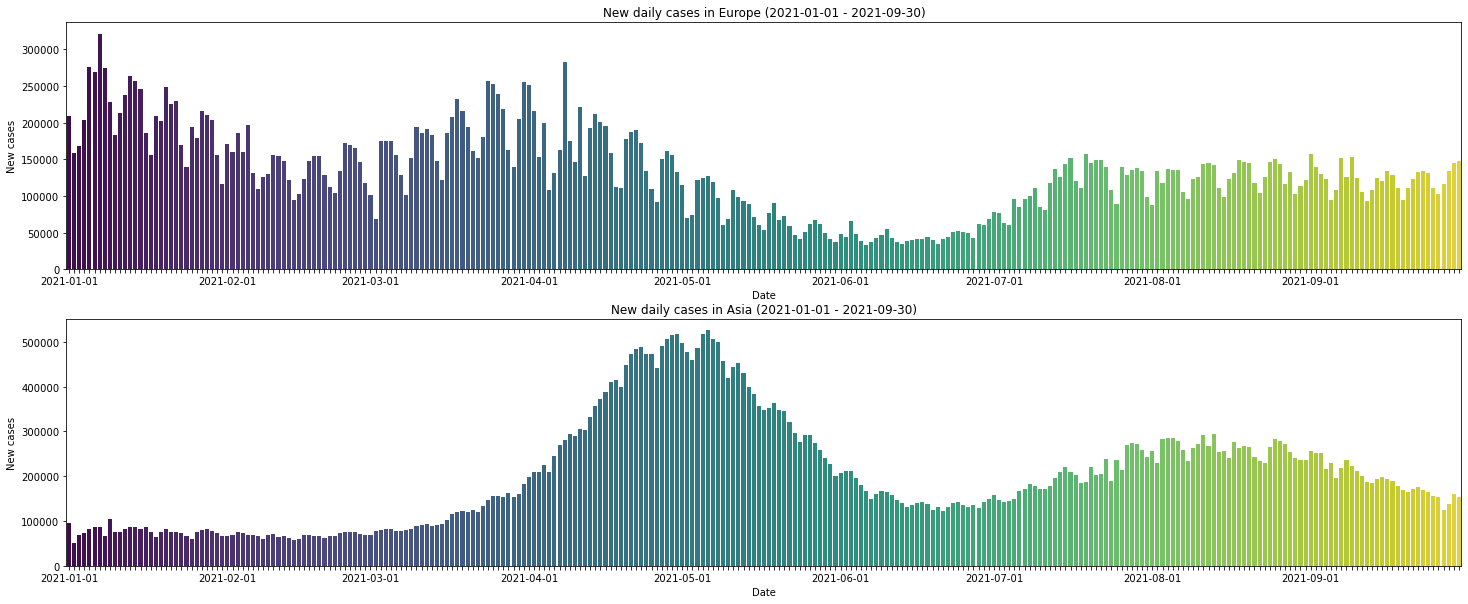

In [10]:
# Create subplots containing 2 rows
fig, axs = plt.subplots(nrows = 2, figsize=(25,10))

# Draw seperate barplots for Europe and Asia datasets
sns.barplot(x = 'date', y = 'new_cases', data = filteredDailyCasesEurope, estimator = sum, ci = None, ax = axs[0], palette="viridis")
sns.barplot(x = 'date', y = 'new_cases', data = filteredDailyCasesAsia, estimator = sum, ci = None, ax = axs[1], palette="viridis")

for axIndex in range(0, len(axs)):
    # Set titles and labels for better presentational purpose 
    continentName = 'Europe' if axIndex == 0 else 'Asia'
    axs[axIndex].set_title('New daily cases in %s (2021-01-01 - 2021-09-30)' % continentName)
    axs[axIndex].set_xlabel('Date')
    axs[axIndex].set_ylabel('New cases')

    # Show x labels only for first day of the month
    for index, label in enumerate(axs[axIndex,].get_xticklabels()):
        label.set_visible(datetime.strptime(label.get_text(), dateFormat).day == 1) 

### From the graphs above, we can make a few insights on the daily cases growth in selected continents. 

* Asia has more stable daily cases growth numbers. The 'waves' of the pandemic are clearly visible - one started somewhere in the begining of April and ended in the middle of June. After that, there was a second, visibly smaller 'wave' that laster for around 2 months starting in June. Overall, the growth and decreese in daily cases is stable and we have really small spikes.
* Europe daily cases are really unstable. It is possible to spot 'waves' but they are not as clear as in the Asia data graph. Data represented in this graph is uneaven and its increases/decreeses are not transitional (does not gradually increace/decrease but is rocky/jumpy instead)

In order to get a better view on how different new daily cases growth is in Europe and Asia, two lineplots were created in the same graph:

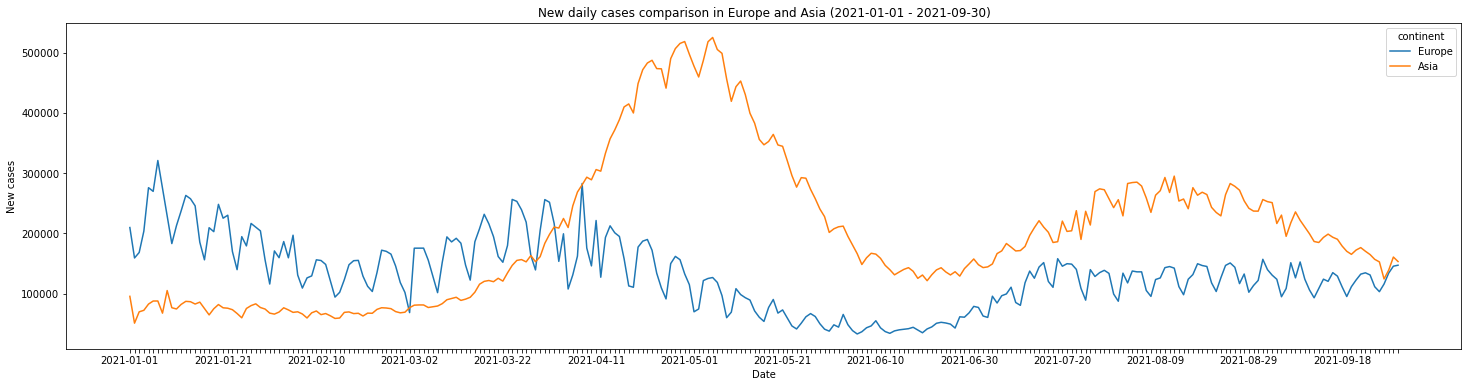

In [11]:
# Join two filtered datasets into one
linesDf = pd.concat([filteredDailyCasesEurope, filteredDailyCasesAsia]).reset_index(drop = True)

fig, ax = plt.subplots(nrows = 1, figsize=(25,6))

# Draw lineplots for both continents data
sns.lineplot(data = linesDf, x = 'date', y = 'new_cases', hue='continent', ax=ax, ci = None, estimator = sum)
ax.set_title('New daily cases comparison in Europe and Asia (2021-01-01 - 2021-09-30)')
ax.set_xlabel('Date')
ax.set_ylabel('New cases')

# Reduce the number of xlabels to print every 20th date value
for index, label in enumerate(ax.get_xticklabels()):
        # https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307
        label.set_visible(index % 20 == 0) 

From the line plot above, the spikes in new daily cases growth in Europe can be easily compared with the growth stability in Asia. There are many factors that have an impact on these tendencies - for i.e. healthcare, fake data reports, lack of testing etc.

Although it is easy to spot the difference of new daily COVID-19 cases growth between selected continents from the graph above, the raw counts between the two datasets cannot be compared due to difference in population. In order to solve this issue, new cases per million was selected instead of new cases, and the same steps were reproduced with new datasets:

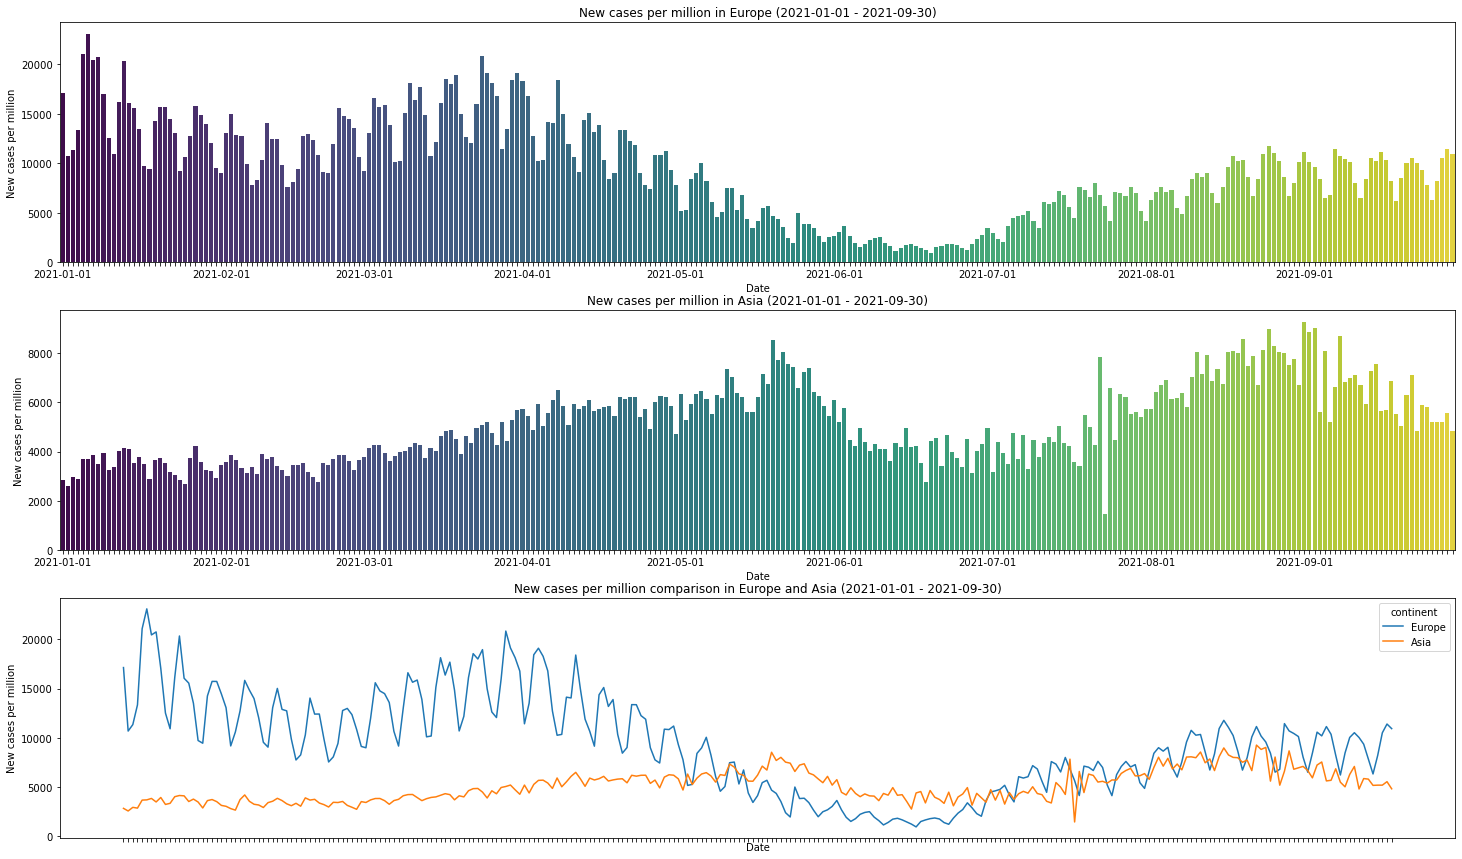

In [12]:
# Select main dataset subset containing only continent, new_cases and date columns
dailyCasesToMilAndContinentSubset = df[['continent','new_cases_per_million', 'date']]

# Get two datasets - one representing Europes and other Asias data subset in specific time interval for new_cases analysis
filteredDailyCasesToMilEurope = filter_continentDailyCases(dailyCasesToMilAndContinentSubset, 'Europe')
filteredDailyCasesToMilAsia = filter_continentDailyCases(dailyCasesToMilAndContinentSubset, 'Asia')
# Join two filtered datasets into one
linesDfToMil = pd.concat([filteredDailyCasesToMilEurope, filteredDailyCasesToMilAsia])

# Draw seperate barplots for Europe and Asia datasets
fig, axs = plt.subplots(nrows = 3, figsize=(25,15))

sns.barplot(x = 'date', y = 'new_cases_per_million', data = filteredDailyCasesToMilEurope, ci = None, ax = axs[0], palette="viridis", estimator = sum)
sns.barplot(x = 'date', y = 'new_cases_per_million', data = filteredDailyCasesToMilAsia, ci = None, ax = axs[1], palette="viridis", estimator = sum)

for axIndex in range(0, len(axs)):
    # Set titles and labels for better presentational purpose 
    continentName = 'Europe' if axIndex == 0 else 'Asia'
    axs[axIndex].set_title('New cases per million in %s (2021-01-01 - 2021-09-30)' % continentName)
    axs[axIndex].set_xlabel('Date')
    axs[axIndex].set_ylabel('New cases per million')

    # Show x labels only for first day of the month
    for index, label in enumerate(axs[axIndex,].get_xticklabels()):
        # https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307
        try:  condition = datetime.strptime(label.get_text(), dateFormat).day == 1
        except ValueError: condition = False
        if condition: label.set_visible(True)
        else: label.set_visible(False)

# Draw lineplots for both continents data
sns.lineplot(data = linesDfToMil, x = 'date', y = 'new_cases_per_million', hue='continent', ax=axs[2], ci = None, estimator = sum)
axs[2].set_title('New cases per million comparison in Europe and Asia (2021-01-01 - 2021-09-30)')
axs[2].set_xlabel('Date')
axs[2].set_ylabel('New cases per million')

# Reduce the number of xlabels to print every 20th date value
for index, label in enumerate(ax.get_xticklabels()):
        # https://stackoverflow.com/questions/38947115/how-to-decrease-the-density-of-x-ticks-in-seaborn/38947307
        label.set_visible(index % 5 == 0) 

Now, from the data visualization above, new conclusions can be made. For example, it is clearly visible, that the new daily COVID-19 cases in Europe most of the time at selected time period is larger per one million people in Europe than in Asia. At the begging of the year, the new daily cases were almost four times greater in Europe than in Asia but after some time situation stabilized and the growth became more or less equal in both continents.

## Conclusion
1. The new daily cases of COVID-19 growth is less stable in Europe than in Asia - there are no gradual increases/decreases in numbers as seen in Asia's data.
2. The total new daily cases numbers are 10 times greater in Asia than in Europe
3. The new daily cases per million people numbers are greater in Europe than in Asia

[back to the top](#main)
<a id='Q2' name='Q2'></a>
## 2. How does fully vaccinated people percentage corelate with daily mortality rate?? 

In order to answer this question properly with comparisons, correlation between different related columns was calculated. First of all, the main correlation between fully vaccinated people count column and new daily deaths column was found. Afterwards these correlations were calculated for comparison reasons:

* new vaccinations and new deaths
* total vaccinations per hundred and new deaths
* people fully vaccinated per hundred and new deaths

When calculating correlations, rows that have missing values in at least on of the selected columns were discarded.

In [13]:
correlationSubset = df[['people_fully_vaccinated', 'new_deaths']].dropna()
correlation = correlationSubset['people_fully_vaccinated'].corr(correlationSubset['new_deaths'])

correlationSubsetTest = df[['new_vaccinations', 'new_deaths']].dropna()
correlationTest = correlationSubsetTest['new_vaccinations'].corr(correlationSubsetTest['new_deaths'])

correlationSubsetTest2 = df[['total_vaccinations_per_hundred', 'new_deaths']].dropna()
correlationTest2 = correlationSubsetTest2['total_vaccinations_per_hundred'].corr(correlationSubsetTest2['new_deaths'])

correlationSubsetTest3 = df[['people_fully_vaccinated_per_hundred', 'new_deaths']].dropna()
correlationTest3 = correlationSubsetTest3['people_fully_vaccinated_per_hundred'].corr(correlationSubsetTest3['new_deaths'])

print('Corelation between fully vaccinated people count and new new deaths is ', correlation)
print('Corelation between new vaccinations and new deaths is ', correlationTest)
print('Corelation between total vaccinations per hundred and new deaths is ', abs(correlationTest2))
print('Corelation between people fully vaccinated per hundred  and new deaths is ', abs(correlationTest3))

Corelation between fully vaccinated people count and new new deaths is  0.4617823608244936
Corelation between new vaccinations and new deaths is  0.6206096796858853
Corelation between total vaccinations per hundred and new deaths is  0.09111016948272095
Corelation between people fully vaccinated per hundred  and new deaths is  0.12053392658358478


## Conclusion

The calculated results were printed out together with explanation texts. **From the results, it is clearly visible that the straight forward answer to the question would be - the correlation between fully vaccinated people percentage corelate and daily deaths is equal to *0.466*.** But to get even better correlation analysis results, other parameters should be compared. The largest correlation from the selected features is between new vaccinations and new deaths (*0.62*), after that follows fully vaccinated people percentage corelation with daily deaths. The smallest and least significant correlation is between total vaccinations per hundred and new deaths.

For even better understanding of the correlations presented above, seaborn library's heatmap was used to visualize the results in graphic view:

<AxesSubplot:>

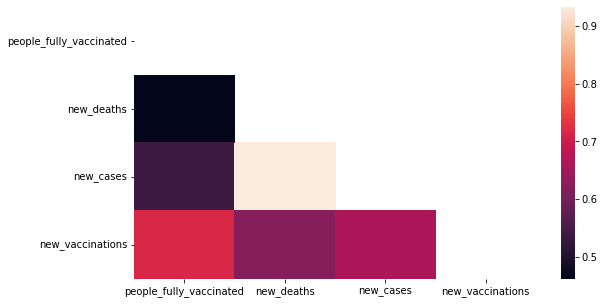

In [14]:
# Source from https://seaborn.pydata.org/examples/many_pairwise_correlations.html
subsetForHeatmap = df[['people_fully_vaccinated', 'new_deaths', 'new_cases', 'new_vaccinations']]

corr = subsetForHeatmap.corr()
mask = np.triu(np.ones_like(corr, dtype = bool))
f, ax = plt.subplots(figsize=(9,5))
sns.heatmap(corr, mask=mask)

The heatmap displays how each of the selected features correlate with each other. On the right side, there is a color palette which shows, which color represents which correlation value. From the graph, it is possible to come to the same conclusions as mentioned before.

[back to the top](#main)
<a id='Q3' name='Q3'></a>
## 3. Is it possible to predict new hospitalized patients number by new cases smoothed per million and people vaccinated per hundred in Baltic states?? 

Before making any predictions, firstly it is needed to prepare the data. Data preparation was done in the following steps:
1. Each country's data was selected in a separate data frame.
2. All of these data frames were joint together to represent Baltic states data.
3. Selected Baltic states data was visualized by using seaborn library's lineplot function.

Steps mentioned above can be seen in the source code below:

1803


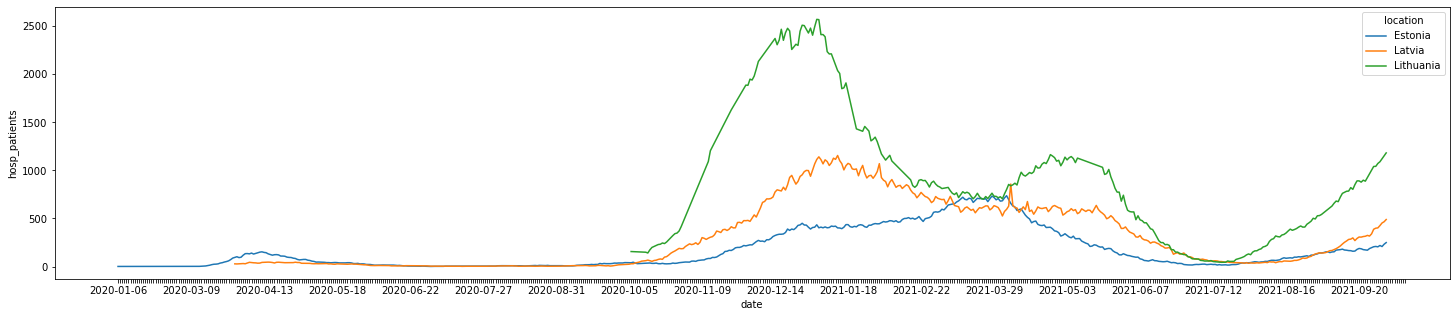

In [15]:
dfLithuania = df[df['location'] == 'Lithuania']
dfEstonia = df[df['location'] == 'Estonia']
dfLatvia = df[df['location'] == 'Latvia']

dfBaltic = df[df['location'].isin(['Lithuania', 'Latvia', 'Estonia'])]
print(len(dfBaltic))

fig, ax = plt.subplots(nrows = 1, figsize=(25,5))
sns.lineplot(data=dfBaltic, x='date', y='hosp_patients', hue='location', ax=ax)

# Show x labels only for first day of the month
for index, label in enumerate(ax.get_xticklabels()):
    label.set_visible(index % 35 == 0) 

The graph displays hospitalized patients count for each day per selected country. It is clear that the three datasets have missing values and different ranges of data. So in order to move forward it is needed to unify them:

In [16]:
selectedFeatures = ['new_cases_smoothed_per_million', 'people_vaccinated_per_hundred', 'hosp_patients', 'date']

dfLithuaniaFiltered = dfLithuania[selectedFeatures].sort_values(by='date')
dfEstoniaFiltered = dfEstonia[selectedFeatures].sort_values(by='date')
dfLatviaFiltered = dfLatvia[selectedFeatures].sort_values(by='date')
print(len(dfLithuaniaFiltered), ', ', len(dfEstoniaFiltered), ', ', len(dfLatviaFiltered))
print('Unify all three datasets: ')

# Need to remove first N values from Latvia and Estonia datasets to keep the same amount of lines in all data frames
dfEstoniaFiltered = dfEstoniaFiltered.iloc[26:, :]
dfLatviaFiltered = dfLatviaFiltered.iloc[7:, :]

print('First date Estonia: ', dfEstoniaFiltered.iloc[0, :].date, 'last date Estonia: ', dfEstoniaFiltered.iloc[-1, :].date)
print('First date Latvia: ', dfLatviaFiltered.iloc[0, :].date, 'last date Latvia: ', dfLatviaFiltered.iloc[-1, :].date)
print('First date Lithuania: ', dfLithuaniaFiltered.iloc[0, :].date, 'last date Lithuania: ', dfLithuaniaFiltered.iloc[-1, :].date)

print(len(dfLithuaniaFiltered), ', ', len(dfEstoniaFiltered), ', ', len(dfLatviaFiltered))

590 ,  616 ,  597
Unify all three datasets: 
First date Estonia:  2020-02-29 last date Estonia:  2021-10-10
First date Latvia:  2020-02-29 last date Latvia:  2021-10-10
First date Lithuania:  2020-02-29 last date Lithuania:  2021-10-10
590 ,  590 ,  590


After performed actions, all three datasets have the same date intervals and can be used for further predictions. But before moving to predicting phase, correlations of the features mentioned in the raised question were calculated and compared in order to better understand how well should they allow the models to predict the target feature.

Since all three data sets have the same features and dimensions, helper function was created that prints the received correlation data frame together with an explanation text for better readability.

In [17]:
def print_correlation_data(corrDataframe, datasetName, correlationColumn = 'hosp_patients'):
    print('Correlation with {} of selected features in {} dataset: '.format(correlationColumn, datasetName))
    for key, value in corrDataframe.sort_values(ascending=False, by = correlationColumn)[correlationColumn].iteritems():
        print(key, '%.5f'%value)
    print('---')

The implemented helper function was used for each of the countries correlation results (*correlation results were all converted to absolute values in order to properly compare and sort them*). 

In [18]:
print_correlation_data(dfLithuaniaFiltered.corr().abs(), 'Lithuania')
print_correlation_data(dfEstoniaFiltered.corr().abs(), 'Estonia')
print_correlation_data(dfLatviaFiltered.corr().abs(), 'Latvia')

Correlation with hosp_patients of selected features in Lithuania dataset: 
hosp_patients 1.00000
new_cases_smoothed_per_million 0.94390
people_vaccinated_per_hundred 0.67190
---
Correlation with hosp_patients of selected features in Estonia dataset: 
hosp_patients 1.00000
new_cases_smoothed_per_million 0.93186
people_vaccinated_per_hundred 0.80255
---
Correlation with hosp_patients of selected features in Latvia dataset: 
hosp_patients 1.00000
new_cases_smoothed_per_million 0.96294
people_vaccinated_per_hundred 0.89162
---


The correlations calculations results clearly show that the selected two features (*new_cases_smoothed_per_million* and *people_vaccinated_per_hundred*) have a strong correlation value with hospitalized patients feature (the target feature). Based on these results, it is possible to state that the predictions should be accurate but it is not sufficient enough and cannot be confirmed without actually predicting and evaluating the results.

Just for presentational purposes for each country correlation heat maps were created:

[Text(0, 0.5, ''), Text(0, 1.5, ''), Text(0, 2.5, '')]

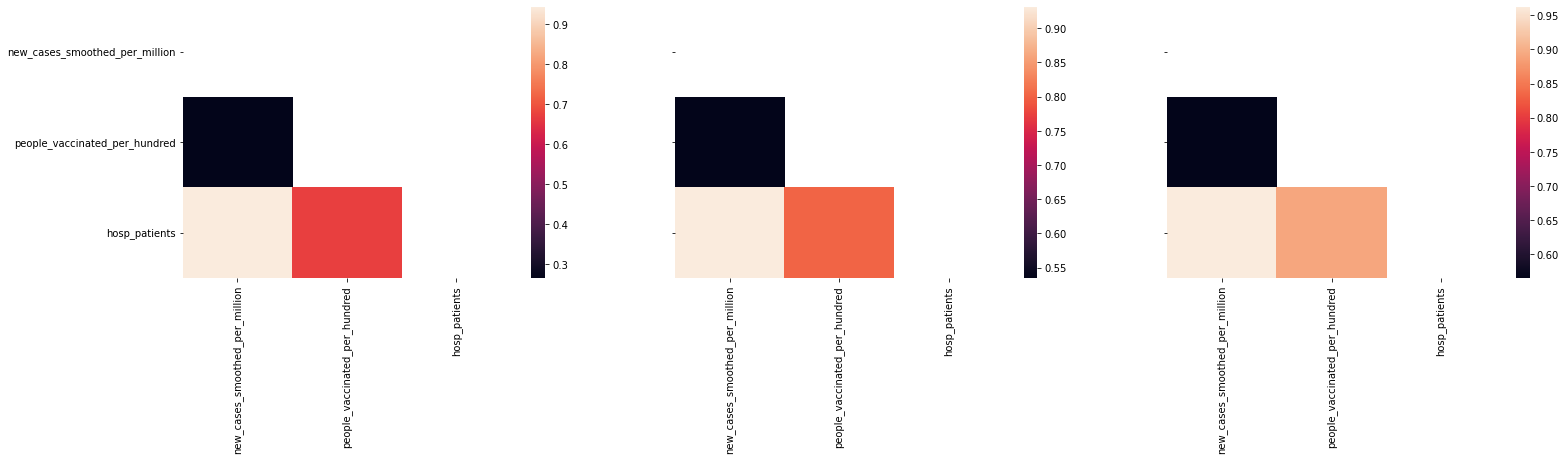

In [19]:
corrLtu = dfLithuaniaFiltered.corr().abs()
corrEst = dfEstoniaFiltered.corr().abs()
corrLat = dfLatviaFiltered.corr().abs()

mask = np.triu(np.ones_like(corrLtu, dtype = bool))
fig, axs = plt.subplots(ncols = 3, figsize=(25,5))
sns.heatmap(corrLtu, mask=mask, ax=axs[0])

mask = np.triu(np.ones_like(corrEst, dtype = bool))
sns.heatmap(corrEst, mask=mask, ax=axs[1])

mask = np.triu(np.ones_like(corrLat, dtype = bool))
sns.heatmap(corrLat, mask=mask, ax=axs[2])

axs[1].set_yticklabels([])
axs[2].set_yticklabels([])

From the graphs presented above, it is visible that not all of three selected countries datasets have same correlations values between selected features but they are similar and can be further worked with.

Now mowing to the predictions part. Firstly, from the filtered datasets for each country, date column was separated since it has no meaning for the target feature predictions. Keep in mind, that the target feature is *hosp_patients* and its is the last column of each datasets.

In [20]:
datesArray = dfLithuaniaFiltered['date']
dfLithuaniaFiltered = dfLithuaniaFiltered[['new_cases_smoothed_per_million', 'people_vaccinated_per_hundred', 'hosp_patients']]
dfEstoniaFiltered = dfEstoniaFiltered[['new_cases_smoothed_per_million', 'people_vaccinated_per_hundred', 'hosp_patients']]
dfLatviaFiltered = dfLatviaFiltered[['new_cases_smoothed_per_million', 'people_vaccinated_per_hundred', 'hosp_patients']]

After the datasets were finally prepared, required libraries need to be imported. For answering this question, two different regression models will be used - *Linear regression* and *Random tree forest regressor*. Firstly, the predictions were made with linear regression model so the required libraries for it and its predicted values accuracy evaluation were imported:

In [21]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import explained_variance_score
from sklearn.metrics import max_error
from sklearn.metrics import r2_score

Then, helper class that splits the dataset into training and testing subsets bases on the percentage value passed to it (*or 80% by default*), when performing the split, all missing values are discarded to keep the predictions more accurate:

In [22]:
def split_data_to_train_and_test(df:pd.DataFrame, percent = 0.8):
    split_index = int(len(df) * percent)
    return df.iloc[:split_index].dropna(), df.iloc[split_index:].dropna()

Additionally, another helper method was created that can be universally used to evaluate the regression model prediction results by using different evaluation methods:

In [23]:
def calculate_and_print_accuracy_scores(predicted, actual, location, X, score):
    explainedVarianceScore = explained_variance_score(actual, predicted, multioutput='uniform_average')
    maxError = max_error(actual, predicted)
    rSquare = r2_score(actual, predicted )
    adjustedRSquare = 1 - (1-score)*(len(actual)-1)/(len(actual)-X.shape[1]-1)

    print('Prediction scores for {} hospitalized patients counts: '.format(location))
    print('')
    print('Explained variance score: {}, (Best would be equal to 1.0)'.format(round(explainedVarianceScore, 4)))
    print('Max error: {}, (Best would be equal to 0.0)'.format(round(maxError, 4)))
    print('R2 score: {}, (Best would be equal to 1.0)'.format(round(abs(rSquare), 4)))
    print('Adjusted R2 score: {}, (Best would be equal to 1.0)'.format(round(abs(adjustedRSquare), 4)))
    print('---')

Finally, helper method that performs linear regression model training, predictions and calls their evaluation/printing method was created:

In [24]:
def predict_linear_regression(data, location):
    trainData, testData = split_data_to_train_and_test(data)

    X_train = trainData.iloc[:, :-1]
    y_train = trainData.iloc[:, -1]
    X_test = testData.iloc[:, :-1]
    y_test = testData.iloc[:, -1]

    regressor = LinearRegression()

    regressor.fit(X_train, y_train)
    score = regressor.score(X_test, y_test)

    predValues = regressor.predict(testData.iloc[:, :-1])
    actualValues = testData.iloc[:, -1].values

    calculate_and_print_accuracy_scores(predValues, actualValues, location, X_test, score)

    return actualValues, predValues

When having all of the three helper methods mentioned above, predicting and evaluating models accuracies can be done with a few easy calls:

In [25]:
print('~~ Predictions with sklearn LinearRegression method ~~')
actualLtu, predictedLtu = predict_linear_regression(dfLithuaniaFiltered, 'Lithuania')
actualEst, predictedEst = predict_linear_regression(dfEstoniaFiltered, 'Estonia')
actualLat, predictedLat = predict_linear_regression(dfLatviaFiltered, 'Latvia')

datesPred = datesArray.iloc[-(len(actualLtu)):]

~~ Predictions with sklearn LinearRegression method ~~
Prediction scores for Lithuania hospitalized patients counts: 

Explained variance score: 0.9389, (Best would be equal to 1.0)
Max error: 136.6848, (Best would be equal to 0.0)
R2 score: 0.9342, (Best would be equal to 1.0)
Adjusted R2 score: 0.9329, (Best would be equal to 1.0)
---
Prediction scores for Estonia hospitalized patients counts: 

Explained variance score: 0.8888, (Best would be equal to 1.0)
Max error: 111.4214, (Best would be equal to 0.0)
R2 score: 0.7131, (Best would be equal to 1.0)
Adjusted R2 score: 0.7448, (Best would be equal to 1.0)
---
Prediction scores for Latvia hospitalized patients counts: 

Explained variance score: 0.5482, (Best would be equal to 1.0)
Max error: 362.7291, (Best would be equal to 0.0)
R2 score: 0.3861, (Best would be equal to 1.0)
Adjusted R2 score: 0.3747, (Best would be equal to 1.0)
---


From the results, it is possible to say that configured linear regression model predicts hospitalized patients count on two selected features quite well. 

* For Lithuania, the acquired prediction evaluations are the highest - explained variance score is more than 0.9, R2 score and adjusted R2 score values are also above 0.9 mark which is really high (maximum accuracy value for these evaluations is 1.0). The Maximum error is over 100 but it does not make the model predictions become undependable.

* For Estonia, these values are a little bit lower - explained variance score is a almost 0.9, R2 score is just above 0.8 mark and adjusted R2 score is equal to 0.87. Although maximum error value is smaller than the one in Lithuania predictions results.

* For Latvia, the predictions were the worst - explained variance score is around 0.5, R2 score and adjusted R2 score are around 0.4. Maximum error is more than 350. These evaluations say, that the model is unacceptable for predicting the target feature..

Received values were represented in three different graphs were predicted values are represented by the **red lines** and actual values by **blue lines**.

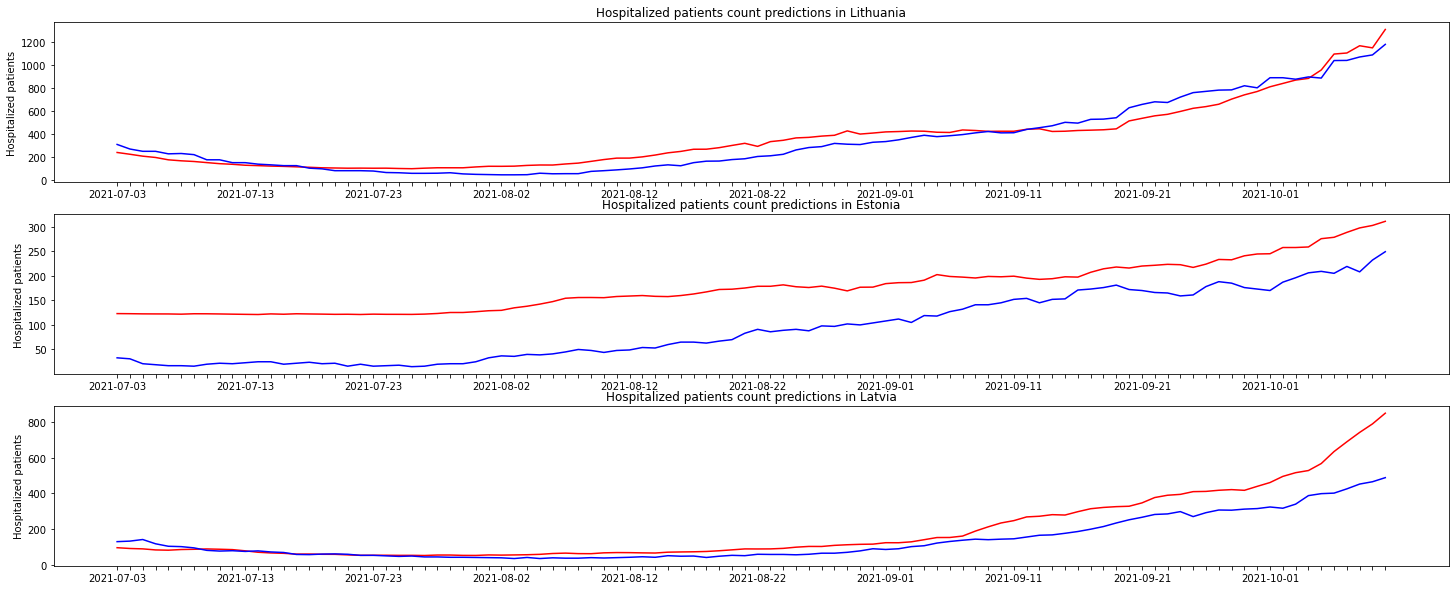

In [26]:
fig, axs = plt.subplots(ncols = 1, nrows = 3, figsize=(25,10))

sns.lineplot(data={'date':datesPred, 'hosp_patients': predictedLtu}, x='date', y='hosp_patients', ax=axs[0], color='red')
sns.lineplot(data={'date':datesPred, 'hosp_patients': actualLtu}, x='date', y='hosp_patients', ax=axs[0], color='blue')

predictedEst = predictedEst[-len(datesPred):]
actualEst = actualEst[-len(datesPred):]
sns.lineplot(data={'date':datesPred, 'hosp_patients': predictedEst}, x='date', y='hosp_patients', ax=axs[1], color='red')
sns.lineplot(data={'date':datesPred, 'hosp_patients': actualEst}, x='date', y='hosp_patients', ax=axs[1], color='blue')

predictedLat = predictedLat[-len(datesPred):]
actualLat = actualLat[-len(datesPred):]
sns.lineplot(data={'date':datesPred, 'hosp_patients': predictedLat}, x='date', y='hosp_patients', ax=axs[2], color='red')
sns.lineplot(data={'date':datesPred, 'hosp_patients': actualLat}, x='date', y='hosp_patients', ax=axs[2], color='blue')

for axIndex in range(0, len(axs)):
    # Set titles and labels for better presentational purpose 
    location = 'Lithuania'
    if axIndex == 1: location = 'Estonia'
    if axIndex == 2: location = 'Latvia'

    axs[axIndex].set_title('Hospitalized patients count predictions in {}'.format(location))
    axs[axIndex].set_xlabel('')
    axs[axIndex].set_ylabel('Hospitalized patients')

    # Show x labels only for first day of the month
    for index, label in enumerate(axs[axIndex].get_xticklabels()):
        label.set_visible(index % 10 == 0) 

From the graphs presented above, it is possible to see how the predictions and actual values differ. The most accurate predictions are clearly seen in the first graph of Lithuania.

Further more, random forest regressor was used to make additional predictions and see how different models could perform in predicting the selected target feature by using selected data features. For this part RandomForestRegressor from sklearn library was used.

In [27]:
from sklearn.ensemble import RandomForestRegressor

In order to easily test the predictions, helper method was created that predicts the values for the given dataset and calls method which calculates the received results accuracy and prints them:

In [28]:
def predict_random_forest(data, location):
    trainDataRtf, testDataRtf = split_data_to_train_and_test(data)

    X_trainRtf = trainDataRtf.iloc[:, :-1]
    y_trainRtf = trainDataRtf.iloc[:, -1]
    X_testRtf = testDataRtf.iloc[:, :-1]
    y_testRtf = testDataRtf.iloc[:, -1]

    regressor = RandomForestRegressor(n_estimators=100, random_state=False)

    regressor.fit(X_trainRtf, y_trainRtf)
    score = regressor.score(X_testRtf, y_testRtf)
    
    y_predRtf=regressor.predict(X_testRtf)

    calculate_and_print_accuracy_scores(y_predRtf, y_testRtf, location, X_testRtf, score)

This method was used in the same way as linear regression model case.

In [29]:
print('~~ Predictions with sklearn RandomForestRegressor method ~~')
predict_random_forest(dfLithuaniaFiltered, 'Lithuania')
predict_random_forest(dfEstoniaFiltered, 'Estonia')
predict_random_forest(dfLatviaFiltered, 'Latvia')

~~ Predictions with sklearn RandomForestRegressor method ~~
Prediction scores for Lithuania hospitalized patients counts: 

Explained variance score: 0.8836, (Best would be equal to 1.0)
Max error: 324.44, (Best would be equal to 0.0)
R2 score: 0.4647, (Best would be equal to 1.0)
Adjusted R2 score: 0.4536, (Best would be equal to 1.0)
---
Prediction scores for Estonia hospitalized patients counts: 

Explained variance score: 0.9141, (Best would be equal to 1.0)
Max error: 88.89, (Best would be equal to 0.0)
R2 score: 0.4286, (Best would be equal to 1.0)
Adjusted R2 score: 0.4181, (Best would be equal to 1.0)
---
Prediction scores for Latvia hospitalized patients counts: 

Explained variance score: 0.7596, (Best would be equal to 1.0)
Max error: 315.54, (Best would be equal to 0.0)
R2 score: 1.4697, (Best would be equal to 1.0)
Adjusted R2 score: 1.5154, (Best would be equal to 1.0)
---


The results received from the random tree forest regressor model are not as good as from linear regressor. Although the explained variance scores are greater for each country, other accuracy criterias are lesser.

* Lithuania's dataset predictions have explained variance score of 0.87 but the R2 together with adjusted R2 score are not reaching 0.4 mark. The maximum error is almost 350.
* Estonia's dataset predictions have explained variance score that is over 0.9, R2 and adjusted R2 scores are around 0.5 and the maximum error is just 81, these results are the best from all three random forest predictions
* Latvia's dataset predictions are again lowest - explained variance score is 0.73, R2 score and adjusted R2 score are both out of bounds and maximum error is over 300, hence these predictions again are inaccurate.

## Conclusion 

1. LinearRegressor and RandomForestRegressor models were used to try predict hospitalized patients count by using two selected features.
2. The accuracy of LinearRegressor predictions is higher than the ones received from RandomForestRegressor. 
3. Accuracy scores, received when predicting target feature by using LinearRegressor were really high and can be marked as dependable results
4. After using and evaluating mentioned prediction models it is safe to say that **it is possible to predict hospitalized patients count by using new cases smoothed per million and people vaccinated per hundred counts**. It is safe to assume that different ML models, additional data normalization and standardization actions, different model configurations could lead to even more accurate prediction scores.

[back to the top](#main)